# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here.
from scipy import stats
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

x=[17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y=[10,1,5,9,4,2,9,6,0,3]
student_data=pd.DataFrame({'age': x, 'tardies': y})
student_data


Bad key "text.kerning_factor" on line 4 in
C:\Users\joaop\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


,age,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

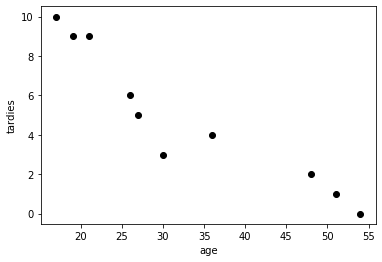

In [2]:
# Your code here.
plt.scatter(x,y,c='black')
plt.xlabel('age')
plt.ylabel('tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Your response here. 
'''
Yes: age and tardies are proportionately inverse. The younger the students are, more likely they are late to class.
'''

'\nYes: age and tardies are proportionately inverse. The younger the students are, more likely they are late to class.\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
#correlation:
student_data['age'].corr(student_data['tardies'])
'''
As we can see, they are very negatively correlated.
So: The younger the students are, more likely they are late to class and vice-versa.
'''

#covariance:
student_data.cov()

,age,tardies
age,187.655556,-45.566667
tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

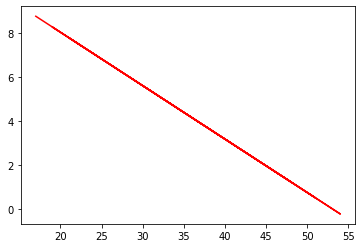

In [5]:
# Your response here.
results=stats.linregress(student_data['age'],student_data['tardies'])
regression_line=results[0]*student_data['age'] + results[1]
plt.plot(x, regression_line, c='red')

Plot your regression model on your scatter plot.

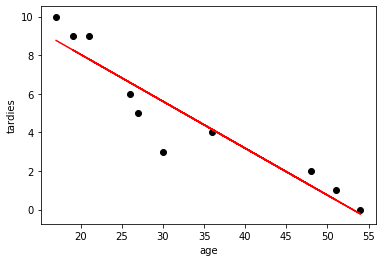

In [6]:
# Your code here.
plt.scatter(x,y,c='black')
plt.xlabel('age')
plt.ylabel('tardies')
plt.plot(x, regression_line, c='red')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [7]:
# Your response here. 
'''
Like stated before, they are very negatively correlated.
So: The younger the students are, more likely they are late to class and vice-versa.
I'd say this is a robust model, but probably it lacks a bit of data for us to be more confident with it.
'''

"\nLike stated before, they are very negatively correlated.\nSo: The younger the students are, more likely they are late to class and vice-versa.\nI'd say this is a robust model, but probably it lacks a bit of data for us to be more confident with it.\n"

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [8]:
# Import any libraries you may need & the data
import statsmodels.api as sm

vehicles=pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [9]:
# Your response here. 
c_year=vehicles['Year'].corr(vehicles['CO2 Emission Grams/Mile'])
print('corr w Year:'+str(c_year))

c_cyl=vehicles['Cylinders'].corr(vehicles['CO2 Emission Grams/Mile'])
print('corr w Cylinders:'+str(c_cyl))

c_fuelbarrels=vehicles['Fuel Barrels/Year'].corr(vehicles['CO2 Emission Grams/Mile'])
print('corr w Fuel Barrels/Year:'+str(c_fuelbarrels))

c_mpg=vehicles['Combined MPG'].corr(vehicles['CO2 Emission Grams/Mile'])
print('corr w Combined MPG:'+str(c_mpg))

c_fuelcost=vehicles['Fuel Cost/Year'].corr(vehicles['CO2 Emission Grams/Mile'])
print('corr w Fuel Cost/Year:'+str(c_fuelcost))

'''
Fuel Barrels/Year is the variable that will better determine CO2 Emission Grams/Mile.
as we can see below, the one that provides less helpful info is 'Year'.
'''

corr w Year:-0.22229960295054238
corr w Cylinders:0.7523925537297486
corr w Fuel Barrels/Year:0.9861886621428727
corr w Combined MPG:-0.9262290389336443
corr w Fuel Cost/Year:0.9308651512201844


"\nFuel Barrels/Year is the variable that will better determine CO2 Emission Grams/Mile.\nas we can see below, the one that provides less helpful info is 'Year'.\n"

In [10]:
vehicles.corr()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [11]:
# Your response here. 
'''
Since we're dealing with several variables, this will not be a linear regression, but a MULTILINEAR REGRESSION.
There are several dependent variables [x's] and one independent variable [y].
For these cases, we'll have to to use the OLS model [with the OLS method from the stats library] and plot afterwards its summary.
'''

"\nSince we're dealing with several variables, this will not be a linear regression, but a MULTILINEAR REGRESSION.\nThere are several dependent variables [x's] and one independent variable [y].\nFor these cases, we'll have to to use the OLS model [with the OLS method from the stats library] and plot afterwards its summary.\n"

In [12]:
#defining variables below:
X=vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
Y=vehicles['CO2 Emission Grams/Mile']

In [13]:
#ploting the summary:
model=sm.OLS(Y,X).fit()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [14]:
# Your response here. 
model.summary()
'''
Looking below we can see the regression coefficients and standard errors of the independent variables, ceteris paribus [all else remaining constant / "equal"].

Coefficient analysis:
All variables have a fairly positive impact on the CO2 Emission Grams/Mile, except for Combined MPG, which is negatively correlated.

P-value analysis:
Since the P-values of our ind. variables are below the convention (p<0.05) we can fairly say that they are also statistically significant.

Goodness of fit analysis:
R-squared is a goodness-of-fit measure for linear regression models.  In this case it has a high value so our model is OK.

'''

'\nLooking below we can see the regression coefficients and standard errors of the independent variables, ceteris paribus [all else remaining constant / "equal"].\n\nCoefficient analysis:\nAll variables have a fairly positive impact on the CO2 Emission Grams/Mile, except for Combined MPG, which is negatively correlated.\n\nP-value analysis:\nSince the P-values of our ind. variables are below the convention (p<0.05) we can fairly say that they are also statistically significant.\n\nGoodness of fit analysis:\nR-squared is a goodness-of-fit measure for linear regression models.  In this case it has a high value so our model is OK.\n\n'

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [15]:
# Your code here.
x=[1, 3, 4, 6, 8, 9, 11, 14]
y=[1,2,4,4,5,7,8,13]

invitations=pd.DataFrame({'invited': x, 'attended': y})
invitations['not attended']=invitations['invited']-invitations['attended']

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

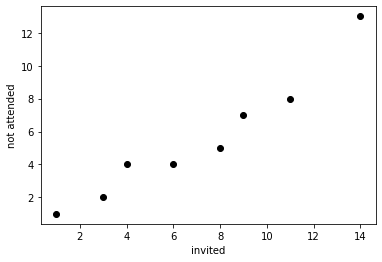

In [16]:
# Your code here.
plt.scatter(x,y,c='black')
plt.xlabel('invited')
plt.ylabel('not attended')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

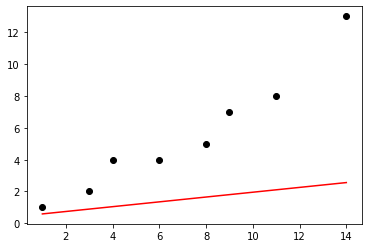

In [17]:
# Your response here. 
'''
The plot tells that their coefficient is likely positive and that they are positively related.
There might be some causality between these two...
'''
results=stats.linregress(invitations['invited'],invitations['not attended'])
regression_line=results[0]*invitations['invited'] + results[1]
plt.scatter(x,y,c='black')
plt.plot(x, regression_line, c='red')
plt.show()

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

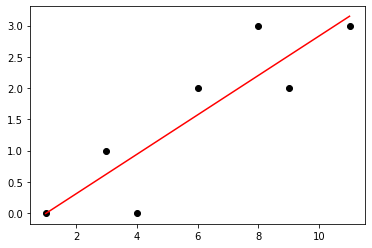

In [18]:
# Your response here. 
'''
Yes, I'd say point (14,13) is an outlier.
'''
invitations=invitations.drop(invitations.tail(1).index)  #removing here the last dot . . . 

#defining x and y for the lin reg:
x=invitations['invited']
y=invitations['not attended']

results=stats.linregress(x,y)
regression_line=results[0]*invitations['invited'] + results[1]

#plotting below...
plt.scatter(x,y,c='black')
plt.plot(x, regression_line, c='red')
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [19]:
# Your response here.
'''
if we remove an outlier, what is expected is that the stats "kpi's" will be more OK.
Also, the R squared will presumably be better.
'''

'\nif we remove an outlier, what is expected is that the stats "kpi\'s" will be more OK.\nAlso, the R squared will presumably be better.\n'